#From the course: Bayesin Machine Learning in Python: A/B Testing
#https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
#https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta


NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()


def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  for i in xrange(NUM_TRIALS):

    #take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print "current samples: %s" % allsamples
      plot(bandits, i)

    #pull the arm for the bandit with the largest sample
    x = bestb.pull()

    #update the distribution for the bandit whose arm we just pulled
    bestb.update(x)


if __name__ == "__main__":
  experiment()

In [3]:
import numpy as np
from scipy import stats

N= 10
a= np.random.randn(N) + 2
b = np.random. randn(N)

var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
s = np.sqrt( (var_a +var_b)/2)
t = (a.mean() - b. mean())/ (s* np.sqrt(2.0/N))
df = 2*N -2
p =1 - stats.t.cdf(t,df =df)
print ("t:\t",t,"p:\t",2*p)

t2,p2 = stats.ttest_ind(a,b)
print ("t2:\t",t2,"p2:\t",p)

t:	 2.6591371445533087 p:	 0.015977222262061552
t2:	 2.6591371445533087 p2:	 0.007988611131030776


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency
%matplotlib inline

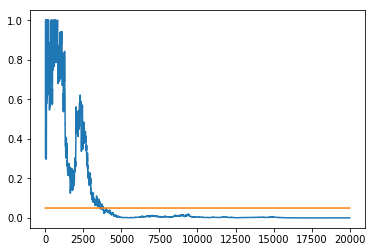

In [12]:
class DataGenerator:
  def __init__(self, p1, p2):
    self.p1 = p1
    self.p2 = p2

  def next(self):
    click1 = 1 if (np.random.random() < self.p1) else 0
    click2 = 1 if (np.random.random() < self.p2) else 0
    return click1, click2


def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p


def run_experiment(p1, p2, N):
  data = DataGenerator(p1, p2)
  p_values = np.empty(N)
  T = np.zeros((2, 2)).astype(np.float32)
  for i in range(N):
    c1, c2 = data.next()
    T[0,c1] += 1
    T[1,c2] += 1
    # ignore the first 10 values
    if i < 10:
      p_values[i] = None
    else:
      p_values[i] = get_p_value(T)
  plt.plot(p_values)
  plt.plot(np.ones(N)*0.05)
  plt.show()

run_experiment(0.1, 0.11, 20000)